<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/pytorch_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [1]:
import pandas as pd

Дані медичне страхування

In [2]:
# трохи обробки даних
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv')

df['sex'] = df['sex'].map({'male': 0, 'female':1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes':1})

df = df.drop(columns=['region'])

data = df[['age', 'bmi', 'expenses']]
df[['age', 'bmi', 'expenses']] = (data - data.min()) / (data.max() - data.min())

In [3]:
df.head()

,age,sex,bmi,children,smoker,expenses
0,0.021739,1,0.320755,0,1,0.251611
1,0.000000,0,0.479784,1,0,0.009636
2,0.217391,0,0.458221,3,0,0.053115
3,0.326087,0,0.180593,0,0,0.333010
4,0.304348,0,0.347709,0,0,0.043816


Потрібно на основі інформації людини спрогнозувати розмір її страховки `expenses`

# Завдання 1
Створіть клас Dataset

In [5]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

In [6]:
device

'cuda'

In [13]:
X = df.drop('expenses', axis="columns")
y = df["expenses"]

In [14]:
from torch.utils.data import Dataset
import torch

class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = torch.FloatTensor(X.values).to(device)
    self.y = torch.FloatTensor(y.values).to(device)
    self.y = self.y.reshape(-1, 1)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

In [15]:
dataset = MyDataset(X, y)

In [16]:
dataset[0][0].device

device(type='cuda', index=0)

In [17]:
dataset[0]

(tensor([0.0217, 1.0000, 0.3208, 0.0000, 1.0000], device='cuda:0'),
 tensor([0.2516], device='cuda:0'))

In [18]:
len(dataset)

1338

# Завдання 2
Створіть DataLoader. Перевірте розміри даних в першому пакеті. Розмір пакетів оберіть самостійно

In [20]:
from torch.utils.data import DataLoader
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, generator=torch.Generator(device=device))

In [21]:
X_batch, y_batch = next(iter(dataloader))

In [22]:
X_batch.shape

torch.Size([64, 5])

In [23]:
X_batch.device

device(type='cuda', index=0)

# Завдання 3
Створіть нейромережу:
* Кількість шарів оберіть між 1-5
* Виберіть різні функції активації: Relu, LeakyRelu, Swish
* Кілкість нейронів у прихованих шарах повинна **не зростати**

In [25]:
from torch import nn

inputs = 5

model = nn.Sequential(
    nn.Linear(inputs, 8),
    nn.ReLU(),

    nn.Linear(8, 7),
    nn.ReLU(),

    nn.Linear(7, 6),
    nn.ReLU(),

    nn.Linear(6, 5),
    nn.ReLU(),

    nn.Linear(5, 4),
    nn.ReLU(),

    nn.Linear(4, 3),
    nn.ReLU(),


    nn.Linear(3, 2),
    nn.ReLU(),


    nn.Linear(2, 1)



)

# Завдання 4
Визначте функцію втрат та оптимізатор

In [27]:
from torch.optim import SGD
loss_func = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=1e-2)

# Завдання 5
Натренуйте нейромережу. візміть невелику кількість епох

In [29]:
import numpy as np
losses = []
epochs = 50

for epoch in range(epochs):
  t_losses = []
  for x, y in dataloader:
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    t_losses.append(loss.item())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  losses.append(np.mean(t_losses))

  if epoch % 1 == 0:
          print(f'loss={losses[-1]}')

loss=0.03844355685370309
loss=0.03761539510673001
loss=0.0374016636716468
loss=0.037381394810619806
loss=0.03736350756315958
loss=0.037299166566559246
loss=0.03744006165791126
loss=0.03733406641653606
loss=0.037306895124770346
loss=0.03735476288767088
loss=0.03732647507318428
loss=0.037365236009160675
loss=0.03742276114367303
loss=0.03738273396378472
loss=0.03738630971028691
loss=0.037316822579928806
loss=0.03735143638082913
loss=0.037330969369837215
loss=0.037372605431647526
loss=0.03732930230242865
loss=0.037415994863424985
loss=0.03742692353469985
loss=0.03730961343362218
loss=0.0373530038410709
loss=0.03747801580244586
loss=0.03735629637681302
loss=0.03736446451927934
loss=0.037357170933059285
loss=0.03738225003083547
loss=0.037426249434550606
loss=0.03738858302434286
loss=0.037445636377448126
loss=0.03732398453922499
loss=0.03732300629573209
loss=0.03735669205586115
loss=0.0374442624549071
loss=0.03733213511960847
loss=0.03732955038902305
loss=0.03733917751482555
loss=0.0373804593

(0.0, 0.05)

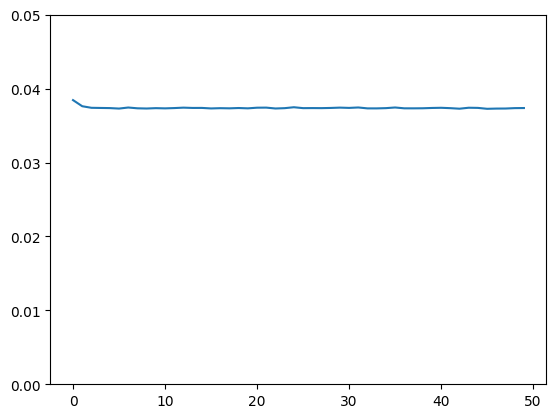

In [33]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylim(0, 0.05)

# Завдання 6
Збережіть нейромережу та зробіть прогноз

In [34]:
torch.save(model, 'model.pt')

In [37]:
model = torch.load("/content/model.pt")
model = model.to(device)
model

Sequential(
  (0): Linear(in_features=5, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=7, bias=True)
  (3): ReLU()
  (4): Linear(in_features=7, out_features=6, bias=True)
  (5): ReLU()
  (6): Linear(in_features=6, out_features=5, bias=True)
  (7): ReLU()
  (8): Linear(in_features=5, out_features=4, bias=True)
  (9): ReLU()
  (10): Linear(in_features=4, out_features=3, bias=True)
  (11): ReLU()
  (12): Linear(in_features=3, out_features=2, bias=True)
  (13): ReLU()
  (14): Linear(in_features=2, out_features=1, bias=True)
)

In [49]:
X_data = torch.FloatTensor(X.iloc[:1].values)
X_data = X_data.to(device)

print(X_data)
print(X_data.shape)
print(y[1])

tensor([[0.0217, 1.0000, 0.3208, 0.0000, 1.0000]], device='cuda:0')
torch.Size([1, 5])
tensor([0.1396], device='cuda:0')


In [48]:
res = model(X_data)
with torch.no_grad():
  print(res)

tensor([[0.1936]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [50]:
loss = res - y[1]
loss

tensor([[0.0539]], device='cuda:0', grad_fn=<SubBackward0>)